# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from bpp.catalog import create_uniform_catalog
from bpp.psf import get_gaussian_psf
from bpp.scene import create_gaussian_cutouts

# Draw Scene

In [18]:
# get astropy catalog of galaxy parameters
cat = create_uniform_catalog(n_rows=9)

In [19]:
# create PSF galsim object
psf = get_gaussian_psf(fwhm=0.7)

In [30]:
# draw the scene
pixel_scale = 0.2
slen = 81
cutouts = create_gaussian_cutouts(slen=slen, catalog=cat, psf=psf, pixel_scale=pixel_scale, g1=0.0, g2=0.0, sky_level=1, seed=0)

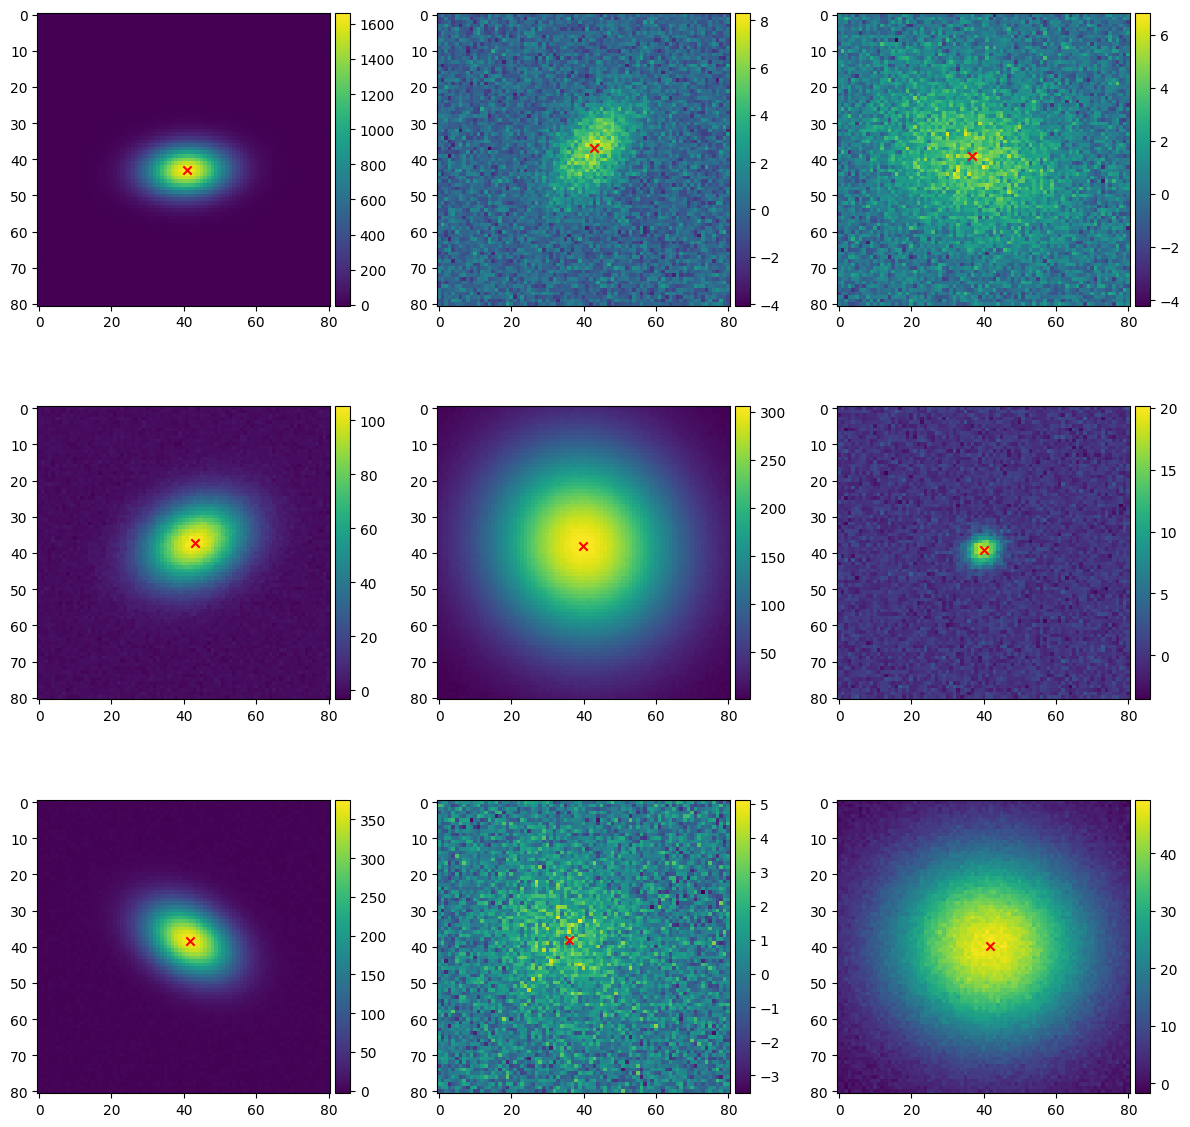

In [31]:
# let's look at some cutouts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for ii, ax in enumerate(axes.flatten()):
    im = ax.imshow(cutouts[ii], interpolation=None)
    # with centers
    ax.scatter(cat[ii]['ra']/ pixel_scale  - 0.5 + slen/2, cat[ii]['dec'] / pixel_scale - 0.5 + slen/2, marker='x', color='r')

    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()


# Save dataset to h5py

In [32]:
import h5py

In [41]:
from astropy.io.misc.hdf5 import read_table_hdf5, write_table_hdf5
with h5py.File('../data/demo.hdf5', 'w') as f:
    f.create_dataset('images', data=cutouts, dtype=float, shape=cutouts.shape)
    write_table_hdf5(cat, f, path='catalog')

In [44]:
with h5py.File('../data/demo.hdf5', 'r') as f:
    cat = read_table_hdf5(f, path='catalog')
    images = f['images'][:]
    print(cat)
    print(images.shape)

       flux             fluxnorm_d      ...         dec         
------------------ -------------------- ... --------------------
 382848.8435320386   0.6675591954518065 ...   0.6034253526659066
2267.9626037863354   0.7870327613453602 ...  -0.5954543594337438
 5883.008485731887    0.671194129209526 ... -0.16264356552239945
 49888.45464488494   0.8476451087033641 ...  -0.5651082396770652
 643161.5301929686   0.3158348778525355 ...  -0.4127102495926258
1178.8719937495623  0.26906435906964876 ... -0.15669389352189933
 127780.5939387171 0.030346822521300387 ... -0.34546988890183816
 2484.701588062089   0.6186430215889719 ... -0.38843893637041904
 108830.6262911891   0.7642681112694986 ... -0.06246087378591958
(9, 81, 81)
